# Flight Delay Prediction Project

## Overview
This project aims to develop a flight delay prediction feature for a travel app. The feature provides users with insights to help them select on-time flights and avoid frequently delayed flights. The project uses machine learning models to classify flights as either **on time** or **delayed** based on historical flight data.

---

## Dataset Description

The dataset used for this project is titled **`Flight Delay Dataset.csv`**, containing data from 2017 to 2018. It includes features such as flight dates, departure and arrival times, origin and destination details, and delay metrics.

### Key Columns:
- **Year**: Year of the flight.
- **Quarter**: Quarter of the year (1–4).
- **DayOfMonth**: Day of the month.
- **DayOfWeek**: Day of the week.
- **FL_DATE**: Flight date.
- **UNIQUE_CARRIER**: Marketing carrier code.
- **ORIGIN & DEST**: Origin and destination airport codes.
- **CRSDepTime**: Scheduled departure time (local time, hhmm).
- **DEP_TIME**: Actual departure time (local time, hhmm).
- **ARR_DELAY**: Arrival delay in minutes (negative values indicate early arrivals).
- **DISTANCE**: Distance between origin and destination (miles).
- **DISTANCE_GROUP**: Categorized distance intervals (250-mile bins).

---


## Aproach 
In this project we are dealing with a classification problem. Therefore we have fitted our dataset into few popular machine learning models such as K-Nearest Neighbors, Linear Regression, Random Forest and Gradient Boosting to predict whether a flight is delayed or not. Finally, we will select one or two models based on their model performance evaluation metrics.

The present study deals with the following steps were followed to achieve the goal of this project.

### i) Exploratory Data Analysis

- Reading the data as Pandas DataFrame
- Checking the data types and looking for missing values
- Checking the basic statistics of the variables
- Exploring the data using Barplots, Histogram, Boxplot, and Association heatmap.

### ii) Data preprocessing

- Create feature set and target
- Data transformation
- Spliting dataset into train and test

### iii) Fitting dataset into model

- K-Nearest Neighbors
- Logistic Regression
- Random Forest
- Gradient Boosting

### iv) Performance evaluation

- AUC
- Recall
- Precision
- F1-score
- Cohen's Kappa

### v) Feature Importance
### vi) Conclusion

###  Importing Libraries
For better understanding dataset and their relationship we will use some statistical and visualization function.

In [1]:
# Importing libraries and packages for basic statistics
import os # To change working directory
import pandas as pd # to read and manipulating data 
import numpy as np # to calculate mean and standard deviations
import matplotlib.pyplot as plt
import seaborn as sns
from dython import nominal # to find out correlation and visualize it
import datetime as datetime
import holidays


# Importing libraries for classification and performance evaluation
from sklearn.neighbors import KNeighborsClassifier #to build KNeighbors model
from sklearn.ensemble import GradientBoostingClassifier #to build GradientBoosting model
from sklearn.ensemble import RandomForestClassifier #to build RandomForest model
from sklearn.tree import DecisionTreeClassifier #to build a classification tree
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score
from imblearn.over_sampling import SMOTE  # For oversampling the minority class

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

%matplotlib inline
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

### i) Exploratory Data Analysis

##### Reading the data as Pandas DataFrame

In [2]:
#Load dataset to start EDA
df = pd.read_csv('Flight Delay Dataset.csv')
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEP_TIME,ARR_TIME,ARR_DELAY,AIR_TIME,DISTANCE,DISTANCE_GROUP
0,2017,3,7,11,2,7/11/2017,DL,LIT,"Little Rock, AR",AR,ATL,"Atlanta, GA",GA,538,757,-11.0,64,453,2
1,2018,1,3,14,3,3/14/2018,DL,BOS,"Boston, MA",MA,ATL,"Atlanta, GA",GA,1829,2108,-23.0,127,946,4
2,2017,4,11,12,7,11/12/2017,WN,ATL,"Atlanta, GA",GA,DAL,"Dallas, TX",TX,1345,1451,-9.0,106,721,3
3,2017,3,8,22,2,8/22/2017,EV,ATL,"Atlanta, GA",GA,HPN,"White Plains, NY",NY,1158,1408,-21.0,113,780,4
4,2018,1,3,2,5,3/2/2018,DL,MSY,"New Orleans, LA",LA,ATL,"Atlanta, GA",GA,522,737,-19.0,59,425,2


In [3]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'UNIQUE_CARRIER', 'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR',
       'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEP_TIME', 'ARR_TIME',
       'ARR_DELAY', 'AIR_TIME', 'DISTANCE', 'DISTANCE_GROUP'],
      dtype='object')

After reading the dataset, we used head() function to display the dataset and columns function for column name.

#### Checking the data types and looking for missing values

In next step we gather some information about different rows and columns in Dataset. We use df.shape and df.info() which gives information about the number of rows, columns, column data types, memory usage, etc. Then isnull() function will be used which find out whether there are missing values present or not.

In [4]:
# To find the number of rows and columns
print(df.shape)
# check for the data types, memory usage, etc
display(df.info())

(148052, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148052 entries, 0 to 148051
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              148052 non-null  int64  
 1   QUARTER           148052 non-null  int64  
 2   MONTH             148052 non-null  int64  
 3   DAY_OF_MONTH      148052 non-null  int64  
 4   DAY_OF_WEEK       148052 non-null  int64  
 5   FL_DATE           148052 non-null  object 
 6   UNIQUE_CARRIER    148052 non-null  object 
 7   ORIGIN            148052 non-null  object 
 8   ORIGIN_CITY_NAME  148052 non-null  object 
 9   ORIGIN_STATE_ABR  148052 non-null  object 
 10  DEST              148052 non-null  object 
 11  DEST_CITY_NAME    148052 non-null  object 
 12  DEST_STATE_ABR    148052 non-null  object 
 13  DEP_TIME          148052 non-null  int64  
 14  ARR_TIME          148052 non-null  int64  
 15  ARR_DELAY         147985 non-null  float64
 16  AIR_TIM

None

**Observations**: <br>
Number of rows = **148052** <br>
Number of columns = **19**  <br>


In [5]:
# checking the no. of missing values in the dataset
df.isnull().sum()

YEAR                 0
QUARTER              0
MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
FL_DATE              0
UNIQUE_CARRIER       0
ORIGIN               0
ORIGIN_CITY_NAME     0
ORIGIN_STATE_ABR     0
DEST                 0
DEST_CITY_NAME       0
DEST_STATE_ABR       0
DEP_TIME             0
ARR_TIME             0
ARR_DELAY           67
AIR_TIME             0
DISTANCE             0
DISTANCE_GROUP       0
dtype: int64

There are 67 observations are missed from the "ARR_DELAY" column. As the proportion of missing value is small, we can drop the rows with missing values.

In [6]:
df = df.dropna()

#### Checking the basic statistics of the variables

In [7]:
# statistics of the numerical variables
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
YEAR,147985.0,2017.342825,0.474655,2017.0,2017.0,2017.0,2018.0,2018.0
QUARTER,147985.0,2.462655,1.103377,1.0,1.0,2.0,3.0,4.0
MONTH,147985.0,6.374187,3.380079,1.0,3.0,6.0,9.0,12.0
DAY_OF_MONTH,147985.0,15.775788,8.773347,1.0,8.0,16.0,23.0,31.0
DAY_OF_WEEK,147985.0,3.898679,1.987838,1.0,2.0,4.0,6.0,7.0
DEP_TIME,147985.0,1344.014224,496.272585,1.0,939.0,1335.0,1738.0,2400.0
ARR_TIME,147985.0,1477.705740,512.551125,1.0,1103.0,1504.0,1911.0,2400.0
ARR_DELAY,147985.0,1.876420,44.004140,-173.0,-15.0,-7.0,4.0,1455.0
AIR_TIME,147985.0,93.449208,55.386738,15.0,60.0,83.0,106.0,631.0
DISTANCE,147985.0,658.072420,469.326366,83.0,373.0,566.0,746.0,4502.0


  **NOTE**:
- It is observed that the mean and median values of most variables in the dataset are not similar, suggesting that these variables do not exhibit a symmetrical distribution. 
- The dataset may contain extreme outliners. For futher confirmation we will visualize dataset with boxplot.

###### Converting the time variable into HH:MM format

In [8]:
df['DEP_TIME']

0          538
1         1829
2         1345
3         1158
4          522
          ... 
148047    1547
148048    1106
148049     949
148050    1410
148051    1749
Name: DEP_TIME, Length: 147985, dtype: int64

It is noted that the times are not in the correct format so we will convert them into HH:MM format.

In [9]:
# def CreateTimeFormatted(hours):
#     if hours == 2400:
#         hours = 0
#     else:
#         hours = "{0:04d}".format(int(hours))
#         Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
#         return Hourmin

##### Extract the weekday, month names and whether a date is holiday or non-holiday.

In [10]:
# Converting the "FL_DATE" into datetime format
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], format='%m/%d/%Y')

In [11]:
# extract the weekday and month names
df['Weekday'] = df['FL_DATE'].dt.day_name()
df['Month_name'] = df['FL_DATE'].dt.month_name()


In [12]:
# Extract the holidays 
us_holidays = holidays.US()
df['holiday_status'] = df['FL_DATE'].apply(lambda x: 'holiday' if x in us_holidays else 'non-holidy')

In [13]:
# Count the number the number of holidays and non-holidays in the dataset
df[['FL_DATE','holiday_status']].drop_duplicates()['holiday_status'].value_counts()

holiday_status
non-holidy    354
holiday        11
Name: count, dtype: int64

There are 11 holidays and 354 non-holidays days in the datasets.

##### Categorizes `DEP_TIME`, `ARR_TIME` into Morning, Afternoon, Evening, or Night.

In [14]:
# Categorize the Departure and arrival times
def categorize_time(time):
    """
    Categorizes a given time into Morning, Afternoon, Evening, or Night.
    
    Args:
        time (int): The time in HHMM format (e.g., 700 for 7:00 AM, 1300 for 1:00 PM).

    Returns:
        str: The time category (Morning, Afternoon, Evening, Night).
    """
    if pd.isna(time):
        return 'Unknown'

    hour = int(time // 100)  # Extract the hour from the time

    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

In [15]:
df['DEP_TIME_cato'] = df['DEP_TIME'].apply(categorize_time)#
df['ARR_TIME_cato'] = df['ARR_TIME'].apply(categorize_time)


In [16]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEP_TIME,ARR_TIME,ARR_DELAY,AIR_TIME,DISTANCE,DISTANCE_GROUP,Weekday,Month_name,holiday_status,DEP_TIME_cato,ARR_TIME_cato
0,2017,3,7,11,2,2017-07-11,DL,LIT,"Little Rock, AR",AR,ATL,"Atlanta, GA",GA,538,757,-11.0,64,453,2,Tuesday,July,non-holidy,Morning,Morning
1,2018,1,3,14,3,2018-03-14,DL,BOS,"Boston, MA",MA,ATL,"Atlanta, GA",GA,1829,2108,-23.0,127,946,4,Wednesday,March,non-holidy,Evening,Night
2,2017,4,11,12,7,2017-11-12,WN,ATL,"Atlanta, GA",GA,DAL,"Dallas, TX",TX,1345,1451,-9.0,106,721,3,Sunday,November,non-holidy,Afternoon,Afternoon
3,2017,3,8,22,2,2017-08-22,EV,ATL,"Atlanta, GA",GA,HPN,"White Plains, NY",NY,1158,1408,-21.0,113,780,4,Tuesday,August,non-holidy,Morning,Afternoon
4,2018,1,3,2,5,2018-03-02,DL,MSY,"New Orleans, LA",LA,ATL,"Atlanta, GA",GA,522,737,-19.0,59,425,2,Friday,March,non-holidy,Morning,Morning


In [17]:
#Checking if there is a duplicated row
df.duplicated().sum()

0

In [18]:
# Removing columns that are not needed for prediction
df = df.drop(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'ORIGIN_CITY_NAME','ORIGIN_STATE_ABR','DEST_CITY_NAME','DEST_STATE_ABR', 'DISTANCE_GROUP', 'DEP_TIME', 'ARR_TIME'],axis = 1)


In [19]:
#Checking if there is a duplicated row
df = df.drop_duplicates()

In [20]:
df.shape

(147759, 11)

In [21]:
# Check for skewness in the data
skewness = df[['DISTANCE', 'AIR_TIME']].skew()
print(skewness)

DISTANCE    2.167817
AIR_TIME    2.084888
dtype: float64


**NOTE**
- Close to 0: The variable is approximately symmetrically distributed.
- Positive Skewness (>0): The variable has a right-skewed distribution, meaning it has a longer right tail. 
- Negative Skewness (<0): The variable has a left-skewed distribution, meaning it has a longer left tail. 

It is noted that the following variables are positively skewed:
- DISTANCE
- AIR_TIME

Skewness is rarely a concern for tree-based models. However, addressing extreme skewness may still be useful for feature importance interpretation or fine-tuning results in some cases.

### Creating A Target Variable

- Let us first see the level of delays

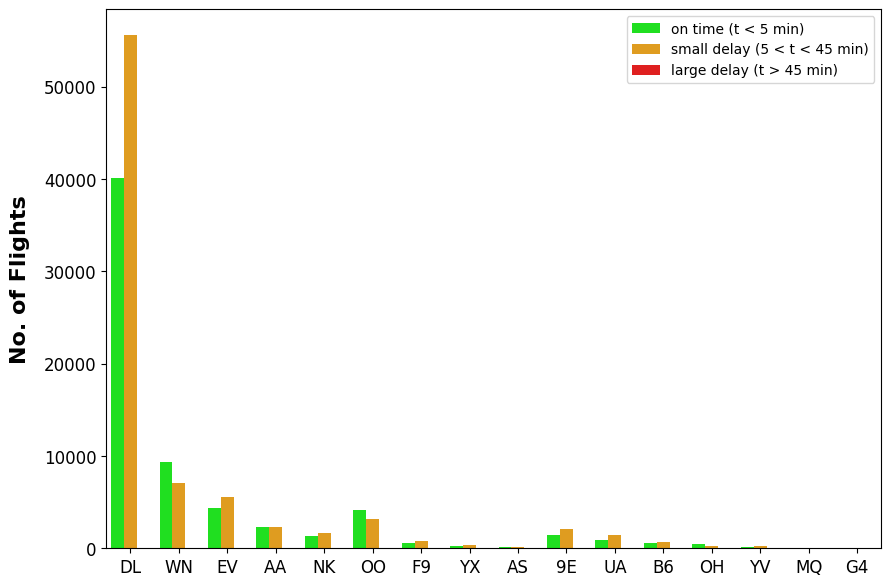

In [22]:


def delay_lavel(data, airlines, delay):
    delay_type = lambda x:((0,1)[x < -5],2)[x < -45]
    data['DELAY_LEVEL'] = data[delay].apply(delay_type)

    fig = plt.figure(1, figsize=(10,7))
    ax = sns.countplot(x=airlines, hue='DELAY_LEVEL', data=df, palette= ["#00FF00","#FFA500","#FF0000"])

    labels = ax.get_xticklabels()
    ax.set_xticklabels(labels)
    plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'normal', rotation = 0);
    plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
    ax.xaxis.label.set_visible(False)
    plt.ylabel('No. of Flights', fontsize=16, weight = 'bold', labelpad=10)

    L = plt.legend()
    L.get_texts()[0].set_text('on time (t < 5 min)')
    L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
    L.get_texts()[2].set_text('large delay (t > 45 min)')
    plt.show()

airlines = 'UNIQUE_CARRIER'
delay = 'ARR_DELAY'
delay_lavel(df, airlines, delay)

##### Extracting a new feature with values of 0 or 1, indicating whether the event is delayed or not.

In [23]:
df['Is_Delayed'] = np.where(df['ARR_DELAY']<=0, 0,1)

**Explore the Target variable: is_delay**

In [24]:
# print the unique class of the Fertilizer 
print("There are two classes in income group: ", df['Is_Delayed'].unique())

There are two classes in income group:  [0 1]


<Axes: xlabel='count', ylabel='Is_Delayed'>

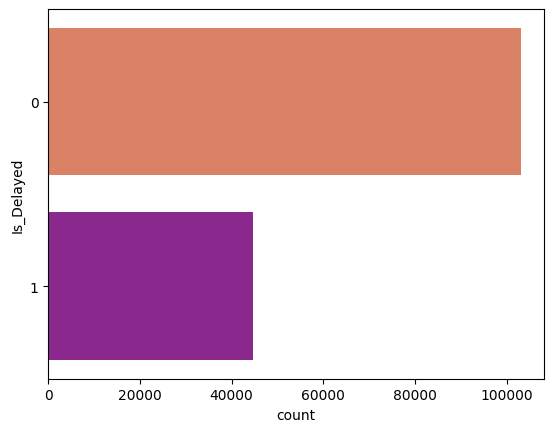

In [25]:
#Visualization of the class in is_Delay category with countplot
sns.countplot(y='Is_Delayed',data=df,palette="plasma_r")

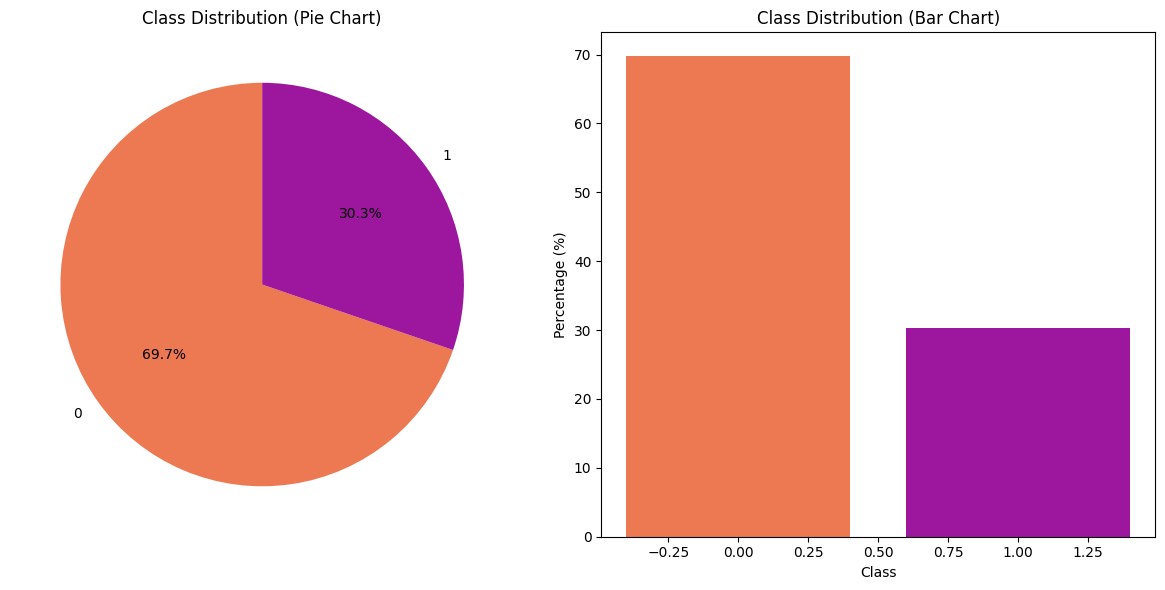

In [26]:
# Count the occurrences of each class
class_counts = df['Is_Delayed'].value_counts()

# Calculate percentages
class_percentages = class_counts / class_counts.sum() * 100

# Get colors from the 'plasma_r' palette using seaborn
colors = sns.color_palette("plasma_r", len(class_percentages))

# Set up the subplot for both the pie and bar charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart with 'plasma_r' palette
axes[0].pie(class_percentages, labels=class_percentages.index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[0].set_title('Class Distribution (Pie Chart)')

# Bar chart with 'plasma_r' palette
axes[1].bar(class_percentages.index, class_percentages, color=colors)
axes[1].set_title('Class Distribution (Bar Chart)')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Percentage (%)')

# Display the charts
plt.tight_layout()
plt.show()

It is noted that the data is moderately imbalanced. 

#### Explore the continuous and categorical feature variables

In [27]:
# Defining function for Continuous variable and their relationship with target variable
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(20,6),tight_layout=True)
    axes[0].set_title('Distogram')
    sns.distplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with target variable')
    sns.boxplot(y = x,x = df['Is_Delayed'])

#### Univariate Analysis 

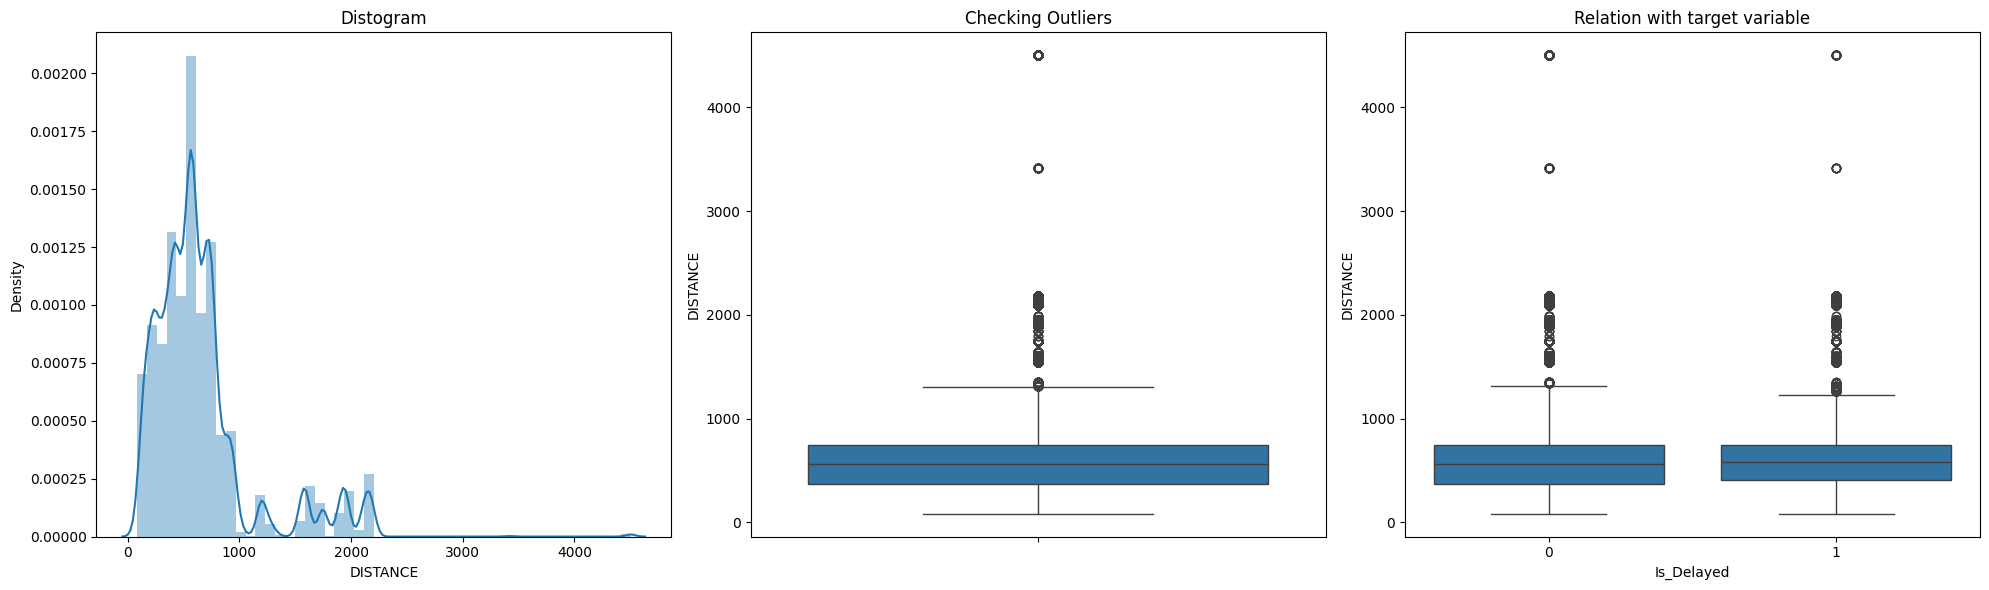

In [28]:
# EDA - Distance 
plot_conti(df['DISTANCE'])

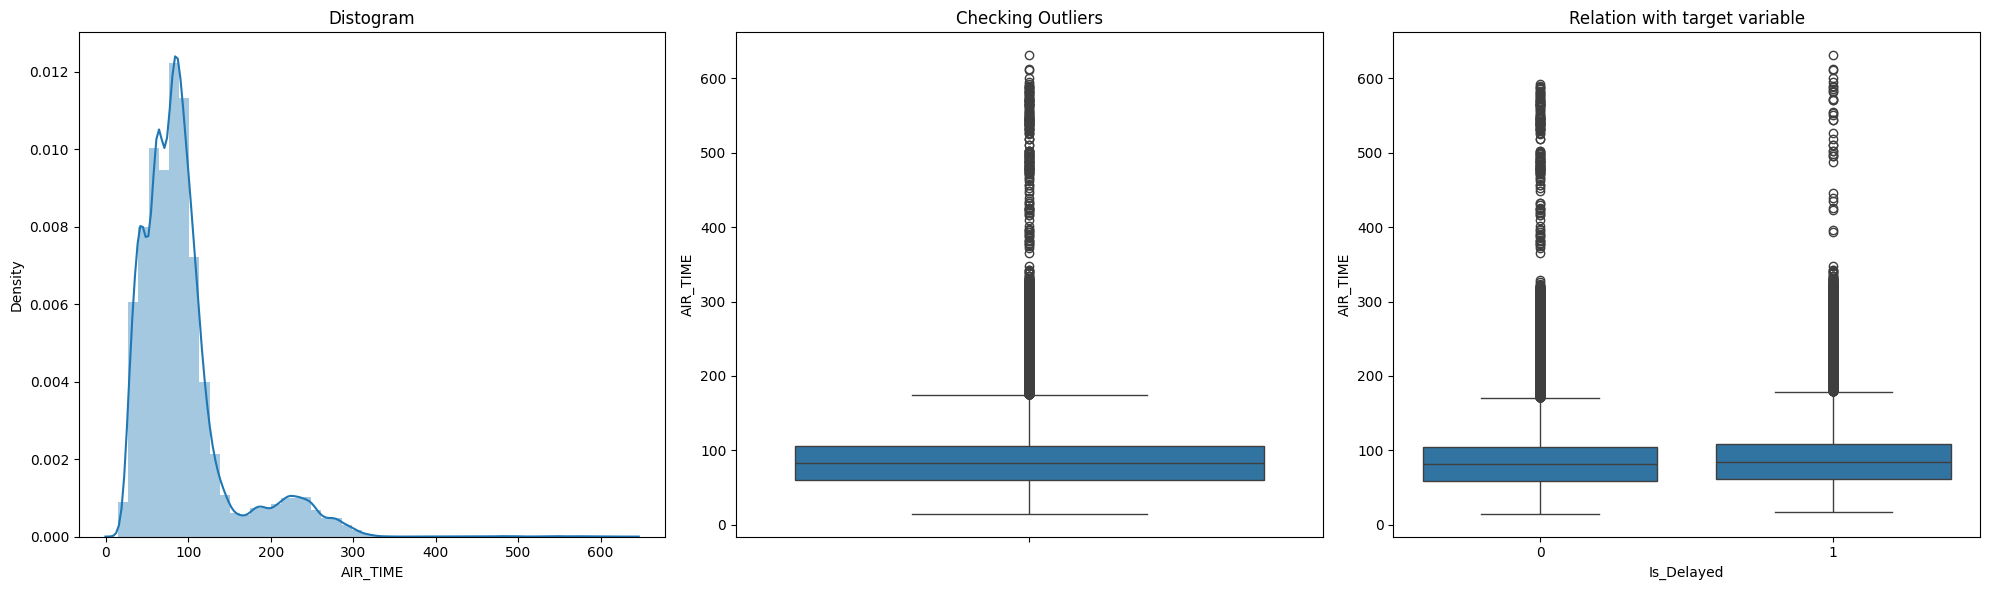

In [29]:
#EDA - Flight Time, in Minutes
plot_conti(df['AIR_TIME'])

In [30]:
# EDA - Departure hour
# plot_conti(df['DEP_HOUR'])

**Note:** 
From the above distoplot and boxplot, it's clear that the given features are either negetively or positively skewed. there are some outliners also present. So, we may need to perform data transformation before applying some models like Logistic Regression and K-NN model but for ensemble model, it is not mandatory.

In [31]:
# Defining function to visualize catogorical variable and their relationship with target variable
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = df['Is_Delayed'], ax=axes[1])

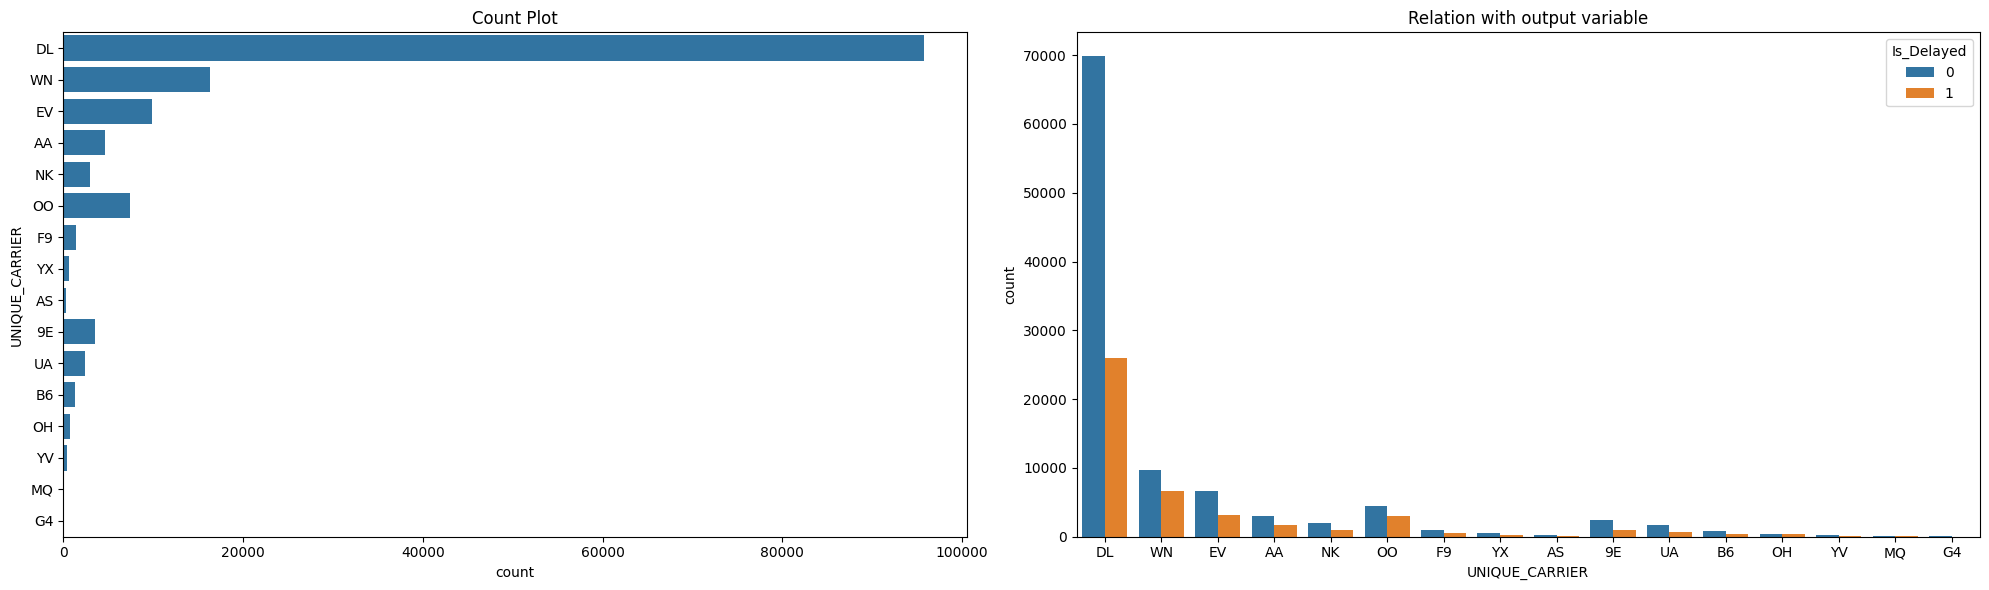

In [32]:
#EDA - Unique Marketing Carrier Code.
plot_cato(df['UNIQUE_CARRIER'])

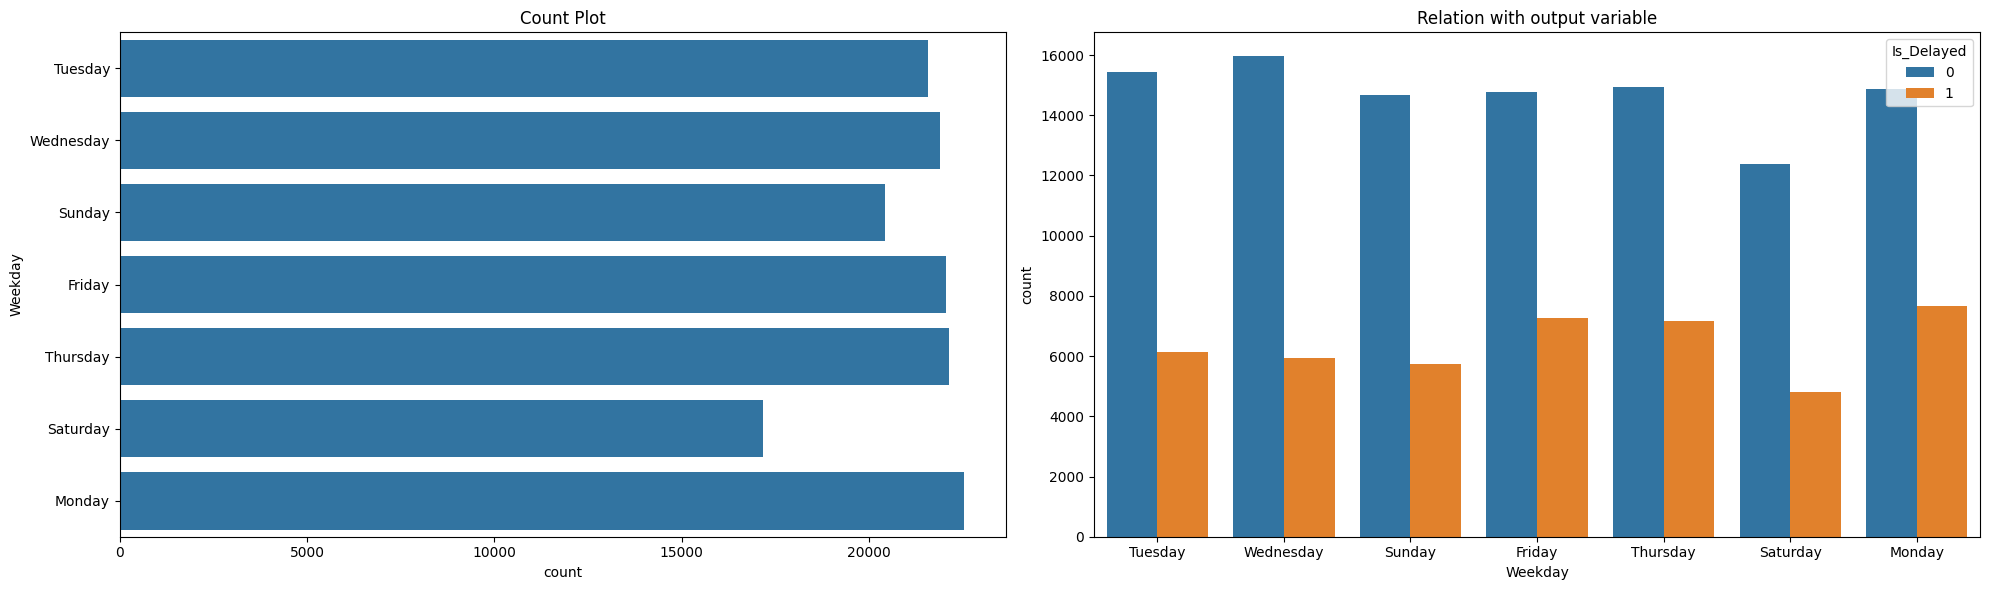

In [33]:
#EDA - Day of week.
plot_cato(df['Weekday'])

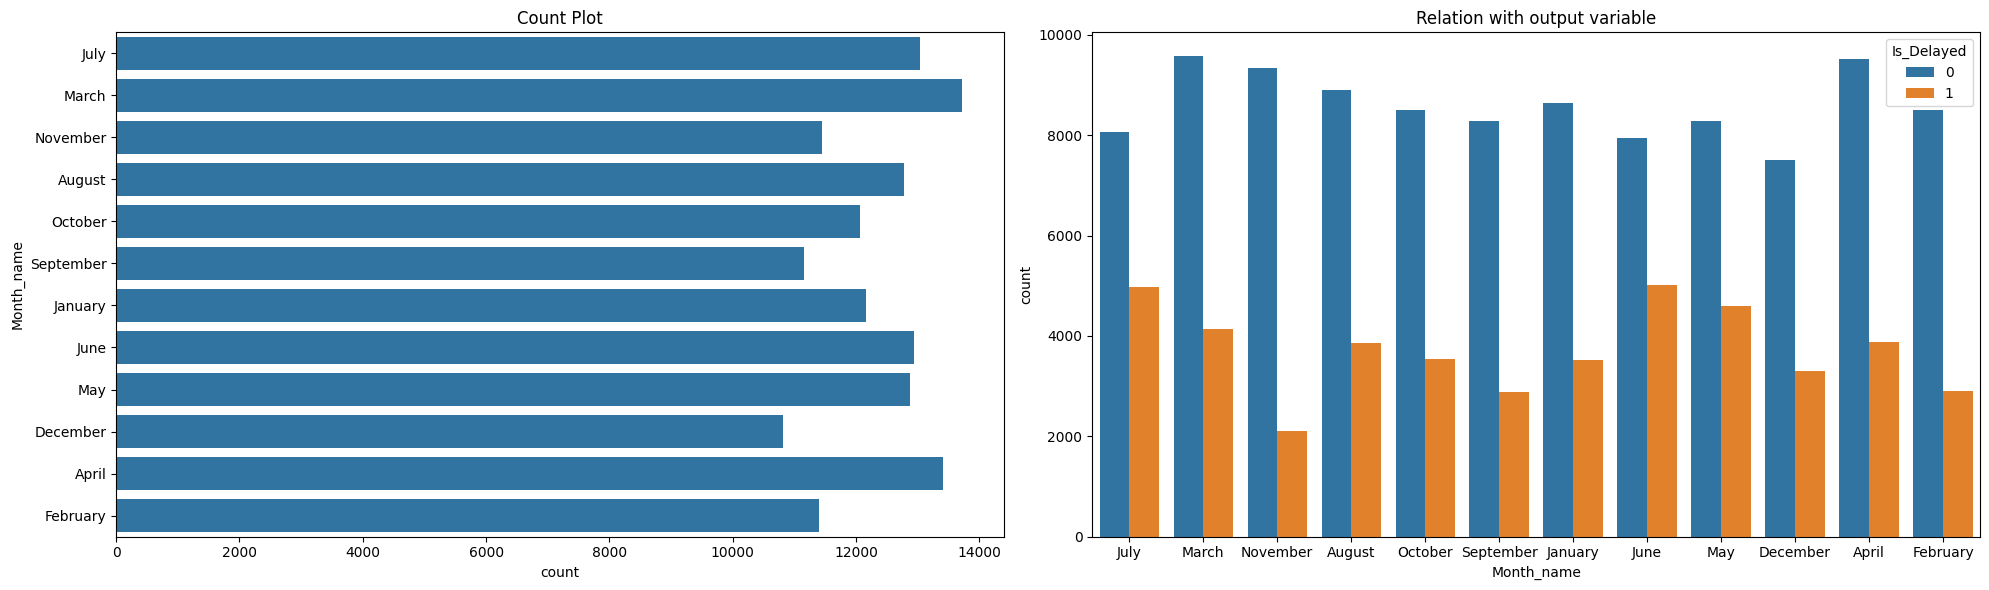

In [34]:
#EDA - month.
plot_cato(df['Month_name'])

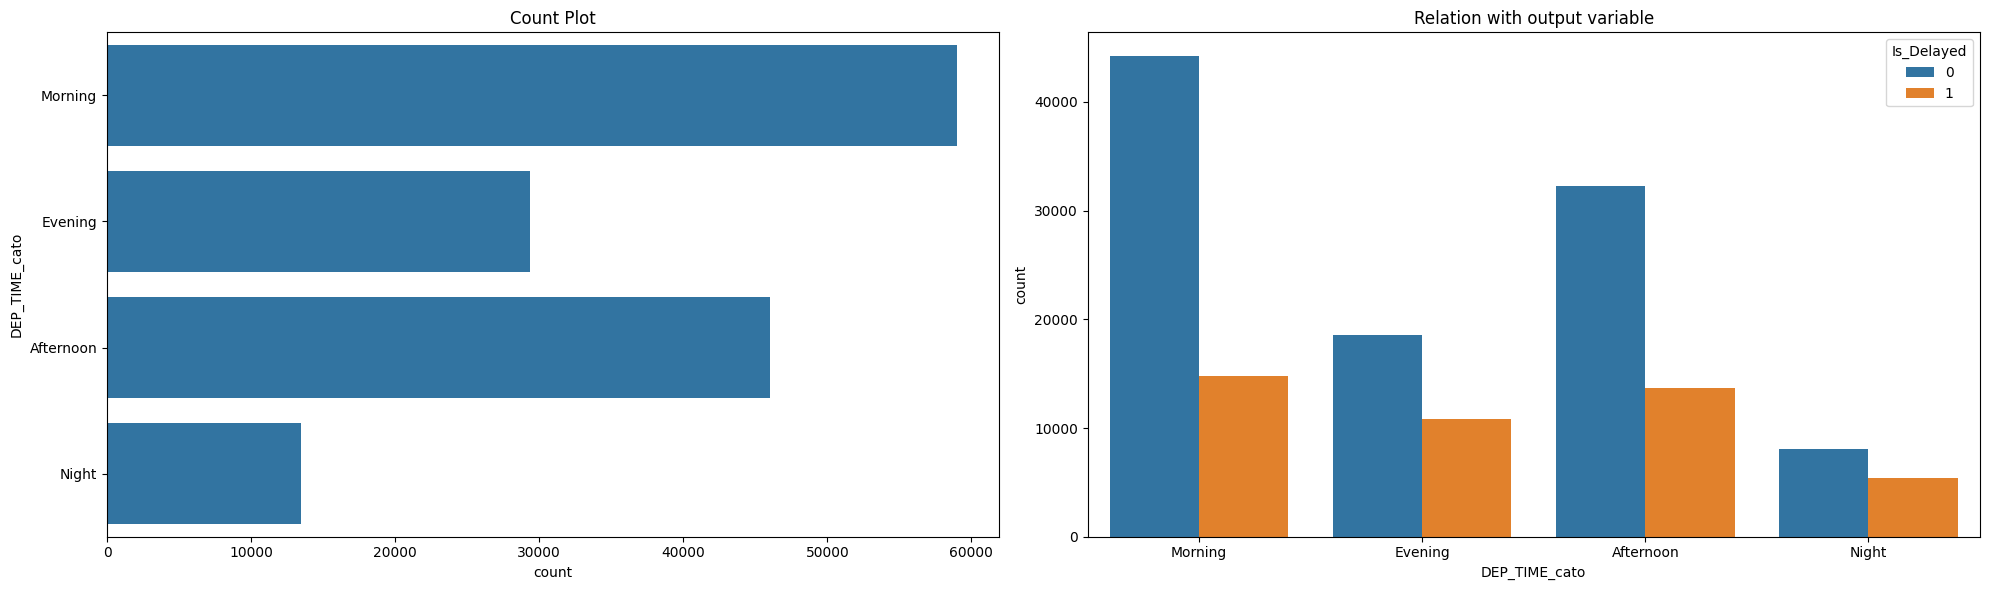

In [35]:
#EDA - DEP_TIME_cato.
plot_cato(df['DEP_TIME_cato'])

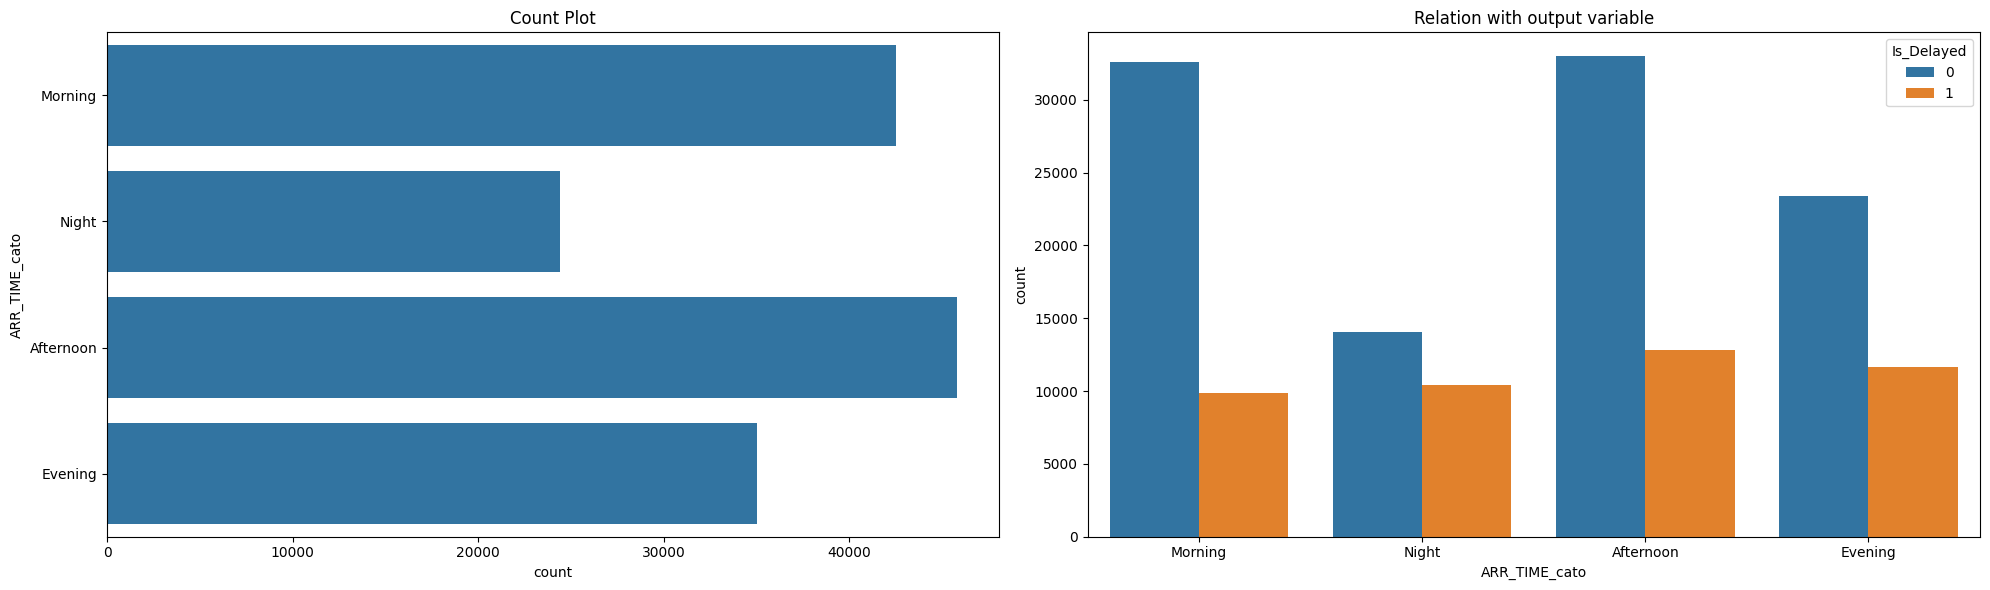

In [36]:
#EDA - ARR_TIME_cato.
plot_cato(df['ARR_TIME_cato'])

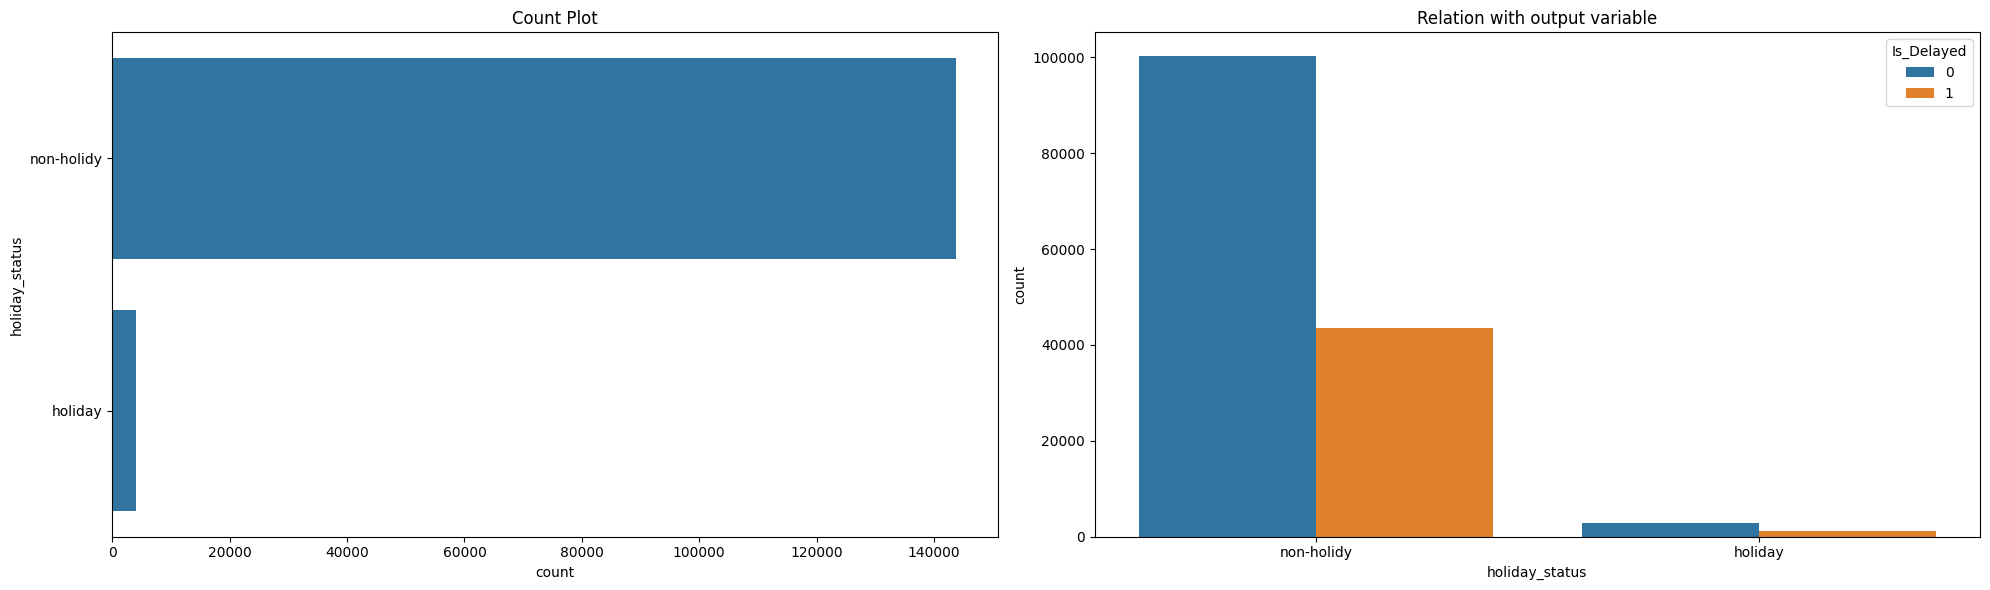

In [37]:
#EDA - Holiday status.
plot_cato(df['holiday_status'])

#### Bi-Variate Analysis

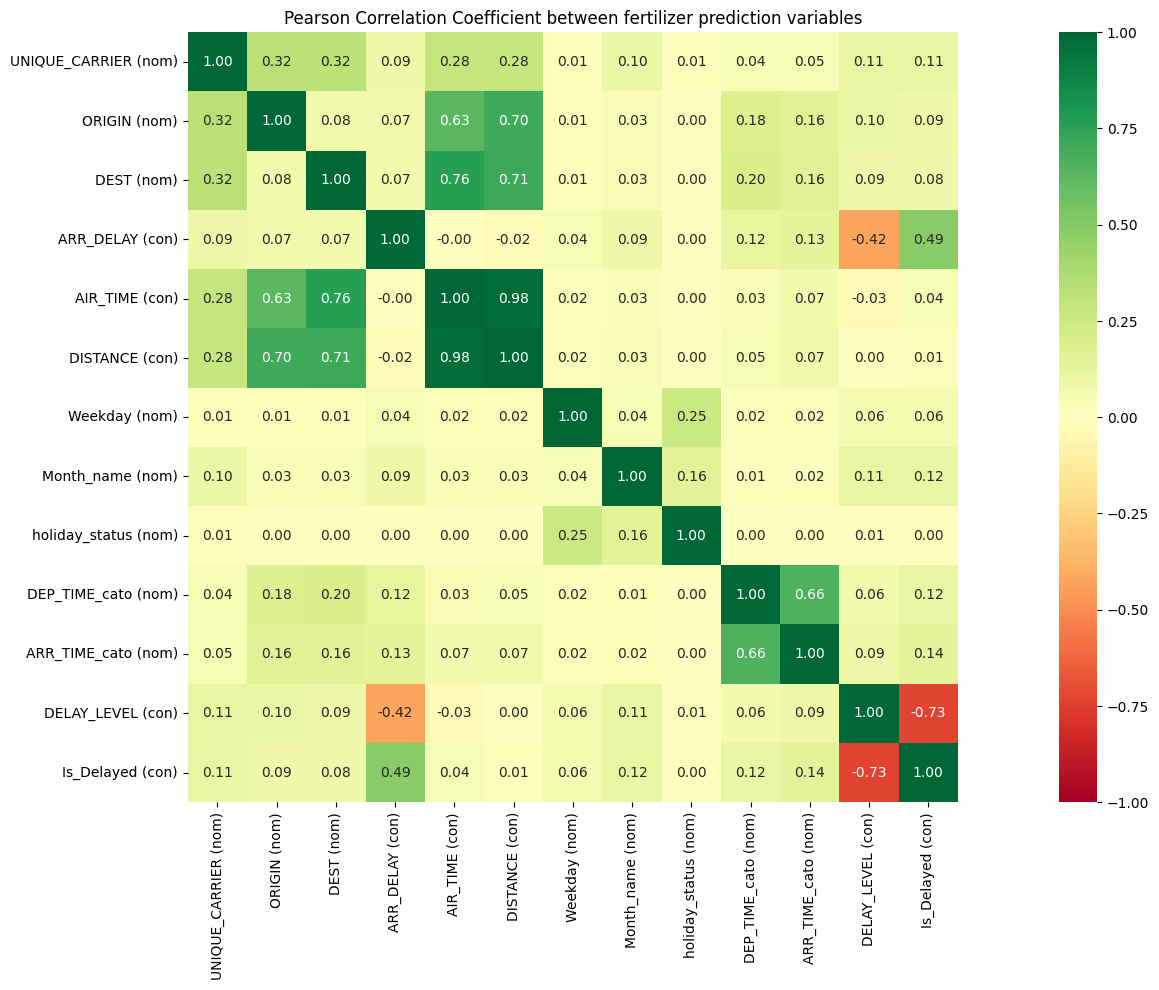

In [38]:
#To find out correlation with both nominal and numeric variables
nominal.associations(df,figsize=(26,10),
                     mark_columns=True,
                     title="Pearson Correlation Coefficient between fertilizer prediction variables",
                     cmap='RdYlGn');

The "DISTANCE" and "AIR_TIME" variables are highly correlated, as longer distances result in longer air times. To avoid redundancy and multicollinearity, we will remove one of these variables for the analysis.

### ii) Data Pre-Processing


##### Skewed Variables

When variables are highly skewed, it can lead to poor model performance, particularly with linear regression, which assumes a normal distribution of residuals. Here are a few strategies:

- **Log Transformation:** For highly skewed variables, consider applying a log transformation to both dependent and independent variables. This can help to normalize their distributions and improve model performance.
- **Model Selection:** Certain models (like tree-based models such as Random Forest and Gradient Boosting) are not sensitive to skewed data. They can handle non-linearities and skewed distributions well. On the other hand, models like Linear Regression are sensitive to skewed data and may require transformation.
- **K-Nearest Neighbors (KNN):** Since KNN uses distances between points, it can also be sensitive to skewed data, particularly in high-dimensional spaces. However, with scaling applied (such as using RobustScaler), the effects of skewness are mitigated.

In [39]:
# Handle Skewness (Log Transform on Skewed Columns)
skewed_columns = ['DISTANCE', 'AIR_TIME']  # Adjust as needed
for col in skewed_columns:
    df[col] = np.log1p(df[col])


#### Handling Outliers

 Outliers can significantly affect the performance of certain machine learning models. To deal with outliers, we can use:

- **RobustScaler:** This scaler, used in your implementation, is an excellent choice because it scales the data using statistics that are robust to outliers. It uses the median and the interquartile range (IQR), making it less sensitive to extreme values compared to standard scaling methods (like MinMaxScaler or StandardScaler).
- **Robust Modeling Approaches:** Some models (e.g., Random Forest, Gradient Boosting) are inherently robust to outliers because they focus on splitting data into groups and are less sensitive to individual extreme values.

In [40]:
# Robust Scaling for Outlier Handling
robust_scaler = RobustScaler()
scaled_columns = ['DISTANCE', 'AIR_TIME']  # Exclude target and spatial data
df[scaled_columns] = robust_scaler.fit_transform(df[scaled_columns])

#### Data transformation

**NOTE**: Machine learning algorithms only understand the number not text, that's the reason we convert our categorical variable to numeric variable. LabelEncoder() function convert unique values of an object variables between 0 to n-1.

In [41]:
lencode = LabelEncoder()

# Applying LabelEncoder() to convert non-number values to numbers

df['UNIQUE_CARRIER']= lencode.fit_transform(df['UNIQUE_CARRIER'])
df['ORIGIN'] = lencode.fit_transform(df['ORIGIN'])
df['DEST'] = lencode.fit_transform(df['DEST'])
df['Weekday'] = lencode.fit_transform(df['Weekday'])
df['Month_name'] = lencode.fit_transform(df['Month_name'])
df['DEP_TIME_cato'] = lencode.fit_transform(df['DEP_TIME_cato'])
df['holiday_status'] = lencode.fit_transform(df['holiday_status'])

##### Create feature set and target 

In [42]:
# We also drop "AIR_TIME" as "AIR_TIME" is correlated with "DISTANCE".
X = df.drop(columns=['Is_Delayed', 'AIR_TIME', 'ARR_DELAY', 'ARR_TIME_cato', 'DELAY_LEVEL'])  # Drop unused columns  
y = df['Is_Delayed'] #Target variable
print('The shape of feature set, X is ' , X.shape)
print('The shape of target, y is ' , y.shape)

The shape of feature set, X is  (147759, 8)
The shape of target, y is  (147759,)


#### Spliting dataset into train and test
 Spliting the data into 70% training and 30% test.
 
Rationale:
- These splits provide a good balance between training data and testing data.
- The training set is large enough to train a robust model.
- The testing set is small enough to evaluate the model's performance without overfitting.

In [43]:
# Create train and test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

print('Shape of X_train is', X_train.shape)
print('Shape of X_test is', X_test.shape)
print('Shape of y_train is', y_train.shape)
print('Shape of y_test is',  y_test.shape)

Shape of X_train is (103431, 8)
Shape of X_test is (44328, 8)
Shape of y_train is (103431,)
Shape of y_test is (44328,)


**NOTE**: We have splitted the dataset 70% for training and 30% for test dataset. 

### iii) Fitting dataset into model

Given the characteristics of my dataset, which includes outliers, skewed variables, and strong correlations between some features, I considered several models. 

- Using GridSearchCV for hyperparameter tuning is crucial to finding the optimal settings for our models, especially for more complex models like Random Forest and Gradient Boosting. This allows us to test different combinations of hyperparameters and select the best-performing model configuration based on cross-validation performance.

- **KNN:** Hyperparameters such as the number of neighbors and the distance metric have a significant impact on model performance. Tuning these parameters will ensure that KNN performs well for our dataset.


#### Classification model: K-Nearnest Neighbors
- KNN does not handle class imbalance inherently. However, we can combine it with techniques like oversampling or adjusting class weights during evaluation.

In [44]:
# Oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=6)  # Adjust 'n_neighbors' as needed
knn.fit(X_resampled, y_resampled)

# Predictions
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)[:, 1]  # For AUC-ROC



#### Classification model: Logistic Regression


In [45]:
from sklearn.linear_model import LogisticRegression
# Train Logistic Regression with class weights
log_reg = LogisticRegression(class_weight='balanced', solver='liblinear')  # 'balanced' adjusts weights automatically
log_reg.fit(X_train, y_train)

# Predictions
y_pred_LR = log_reg.predict(X_test)
y_proba_LR = log_reg.predict_proba(X_test)[:, 1]  # For AUC-ROC


#### Classification model: RandomForest

In [46]:
#Random Forest model
model_RF = RandomForestClassifier(random_state=42)

# Train the model using the training sets
model_RF = model_RF.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_RF = model_RF.predict(X_test)
y_proba_RF = model_RF.predict_proba(X_test)[:, 1]  # For AUC-ROC


#### Classification model: Gradient Boosting

In [47]:
#Gradient Boosting model
model_GB = GradientBoostingClassifier()

# Train the model using the training sets
model_GB = model_GB.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_GB = model_GB.predict(X_test)
y_proba_GB = model_GB.predict_proba(X_test)[:, 1]  # For AUC-ROC


### iv) Performance evaluation of models

Since our dataset is moderately imbalanced, the following metrics are preferred for all three models:

- Precision, Recall, and F1-Score: These are useful for assessing performance on the minority class (positive class in your case).

- ROC-AUC Score: Measures the model's ability to distinguish between positive and negative classes.
- Cohen's Kappa: help to understand how well your model performs beyond just accuracy, especially when dealing with imbalanced datasets.

In [48]:
# AUC-ROC for KNN, Logistic regression, Random Forest and Gradient Boosting
auc_knn = roc_auc_score(y_test, y_proba_knn) # AUC for KNN
auc_lr = roc_auc_score(y_test, y_proba_LR) # AUC for Logistic Regression
auc_rf = roc_auc_score(y_test, y_proba_RF) # AUC for Random Forest
auc_gb = roc_auc_score(y_test, y_proba_GB) # AUC for Gradient Boosting

# Precision for KNN, Logistic regression, Random Forest and Gradient Boosting
precision_knn = precision_score(y_test, y_pred_knn)
precision_lr = precision_score(y_test, y_pred_LR)
precision_rf = precision_score(y_test, y_pred_RF)
precision_gb = precision_score(y_test, y_pred_GB)

#Recall for KNN, Logistic regression, Random Forest and Gradient Boosting
recall_knn = recall_score(y_test, y_pred_knn)
recall_lr = recall_score(y_test, y_pred_LR)
recall_rf = recall_score(y_test, y_pred_RF)
recall_gb = recall_score(y_test, y_pred_GB)

# F1-score for KNN, Logistic regression, Random Forest and Gradient Boosting
f1_knn = f1_score(y_test, y_pred_knn)
f1_lr = f1_score(y_test, y_pred_LR)
f1_rf = f1_score(y_test, y_pred_RF)
f1_gb = f1_score(y_test, y_pred_GB)

# Cohen's Kappa for KNN, Logistic regression, Random Forest and Gradient Boosting
kappa_knn = cohen_kappa_score(y_test, y_pred_knn)
kappa_lr = cohen_kappa_score(y_test, y_pred_LR)
kappa_rf = cohen_kappa_score(y_test, y_pred_RF)
kappa_gb = cohen_kappa_score(y_test, y_pred_GB)

#### Model Comparison

In [49]:
# Collecting AUC, precision, recall, f1-score and Cohen's kappa scores for each model
model_comparison = {
    'Model': ['KNN', 'Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'AUC': [auc_knn, auc_lr, auc_rf, auc_gb],
    'Precision': [precision_knn, precision_lr, precision_rf, precision_gb],
    'Recall': [recall_knn, recall_lr, recall_rf, recall_gb],
    'F1-Score': [f1_knn, f1_lr, f1_rf, f1_gb],
    'Cohen\'s Kappa':[kappa_knn, kappa_lr, kappa_rf, kappa_gb]
}

# Creating a DataFrame to display the results
comparison_df = pd.DataFrame(model_comparison)

# Displaying the comparison table
comparison_df

,Model,AUC,Precision,Recall,F1-Score,Cohen's Kappa
0,KNN,0.578732,0.384412,0.305009,0.340138,0.100248
1,Linear Regression,0.559881,0.349378,0.458112,0.396424,0.082854
2,Random Forest,0.601761,0.413526,0.308078,0.353098,0.128998
3,Gradient Boosting,0.633566,0.599788,0.084824,0.148629,0.079929


**Based on the metrics:**
- **Random Forest:** Balanced performance, highest Cohen's Kappa (0.128998)
- **Gradient Boosting:** High AUC (0.633566) and precision (0.599788), but low recall and F1-score
- **Linear Regression:** High recall (0.458112), but lower precision and Cohen's Kappa
- **KNN:** Lowest performance across most metrics
**Recommendation**

 **Random Forest** remains the best model due to:
- Balanced AUC (0.601761), precision (0.413526), and recall (0.308078)
- Highest Cohen's Kappa (0.128998), indicating better agreement between predicted and actual labels
- Reasonable F1-score (0.353098)

 For most practical applications where balanced performance and reliability matter, **Random Forest** is the most suitable model due to its good AUC, F1-Score, and the highest Cohen's Kappa. So, **Random Forest** outperforms other models given the moderately imbalance datasets and the need to predict the flight is "on time" or "delayed".

 

#### V) Feature Importance

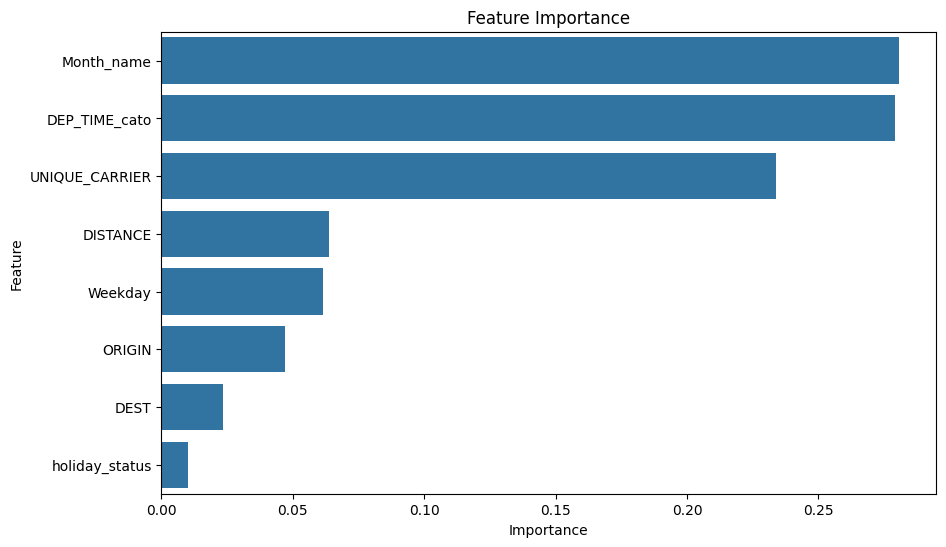

In [50]:

# Feature importance using Random Forest Regressor
feature_importances = model_GB.feature_importances_
feature_names = X.columns

# Sort features by importance in descending order
sorted_features = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)
feature_names, feature_importances = zip(*sorted_features)

# Plot feature importances horizontally
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

From the **Random Forest** model, the following features contributed the most to flight delay predictions:
  - **Month_name** (Month of the year)
  - **DEP_TIME** (Actual Departure Time)
  - **UNIQUE_CARRIER** (Marketing carrier code.)
  - **DISTANCE** (Distance between origin and destination (miles))
  - **Weekday** (Day of the week)
  - **ORIGIN** (Origin Airport code)

### vi) Conclusion

The choice of model should be guided by the characteristics of our dataset. Tree-based models (such as **Random Forest** and **Gradient Boosting**) tend to perform better than linear models in the presence of outliers, skewed data, and correlated features. In this case, **Random Forest** is the most suitable model due to its good AUC, F1-Score, and the highest Cohen's Kappa. 

Here is a summary of the model performance:

| Model                 | AUC      | Precision | Recall   | F1-Score | Cohen's Kappa |
|-----------------------|----------|-----------|----------|----------|---------------|
| **KNN**               | 0.578732 | 0.384412  | 0.305009 | 0.340138 | 0.100248       |
| **Linear Regression** | 0.559881 | 0.349378  | 0.458112 | 0.396424 | 0.082854       |
| **Random Forest**      | 0.601761 | 0.413526  | 0.308078 | 0.353098 | 0.128998       |
| **Gradient Boosting**  | 0.633566 | 0.599788  | 0.084824 | 0.148629 | 0.079929       |





Metrics like recall, precision, F1-score, and AUC assess model accuracy, class distinction, and error balance. Feature importance in tree-based models highlights key factors driving predictions.
- **Gradient Boosting** excels in AUC and precision, **Linear Regression** leads in recall and F1-score, while **Random Forest** offers the most reliable performance with the highest Cohen's Kappa.

Future experimentation should aim at improving model accuracy and interpretability, focusing on hyperparameter tuning, data transformations, or additional feature engineering. By refining these aspects, we can continue to enhance model performance and better justify the choice of model based on the specific needs of the dataset.
